In [2]:
import netCDF4
import json
import numpy as np

# Load the NetCDF file
dataset = netCDF4.Dataset('SPARTACUS2-YEARLY_SA_1961.nc')

# Create a dictionary to hold the data
data = {}

# Loop through each variable and convert it to a list
for var_name, var in dataset.variables.items():
    data[var_name] = {
        "dimensions": var.dimensions,
        "data": var[:].tolist()
    }

# Handle the conversion of numpy data types to native Python types
def hint_tuples(item):
    if isinstance(item, tuple):
        return {'__tuple__': True, 'items': item}
    if isinstance(item, np.generic):
        return np.asscalar(item)
    if isinstance(item, np.ndarray):
        return item.tolist()
    return item

# Save the data to a JSON file
with open('SPARTACUS2-YEARLY_SA_1961.json', 'w') as f:
    json.dump(data, f, default=hint_tuples, indent=4)

# Close the NetCDF dataset
dataset.close()


In [5]:
data = json.load(open('SPARTACUS2-YEARLY_SA_1961.json'))

In [14]:

dataset = netCDF4.Dataset('SPARTACUS2-YEARLY_SA_1961.nc')


In [100]:
import pandas as pd


df = pd.read_csv('MON Datensatz_176703_202309.csv')
df["time"] = pd.to_datetime(df["time"])
df.head()

,time,station,Tautemp,b,b14,b19,b7,eis,eschwuel,festrr,...,sch5,sch50,schdeck,schfall,tmax,tmin,tropen,schmax,s,t
0,1767-03-01 00:00:00+00:00,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1767-04-01 00:00:00+00:00,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1767-05-01 00:00:00+00:00,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1767-06-01 00:00:00+00:00,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1767-07-01 00:00:00+00:00,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.drop(columns=["Tautemp", "b", "b14", "b19", "b7"], inplace=True)

In [102]:
df = df[df["time"].dt.year>= 1931]

In [76]:
df.columns

Index(['time', 'station', 'eis', 'eschwuel', 'festrr', 'festrrp', 'frost',
       'sch1', 'sch10', 'sch100', 'sch15', 'sch20', 'sch30', 'sch5', 'sch50',
       'schdeck', 'schfall', 'tmax', 'tmin', 'tropen', 'schmax', 's'],
      dtype='object')

In [115]:
df_w_nan = df.dropna(subset=['eis', 'eschwuel', 'festrr', 'festrrp', 'frost',
       'sch1', 'sch10', 'sch100', 'sch15', 'sch20', 'sch30', 'sch5', 'sch50',
       'schdeck', 'schfall', 'tmax', 'tmin', 'tropen', 'schmax'], axis=0, how="all")

In [118]:
df_wo_nan = df.drop(columns=['eschwuel', 'festrr', 'festrrp', 'frost',
       'sch1', 'sch10', 'sch100', 'sch15', 'sch20', 'sch30', 'sch5', 'sch50',
       'schdeck', "s"]).dropna(axis=0)

<AxesSubplot:xlabel='time'>

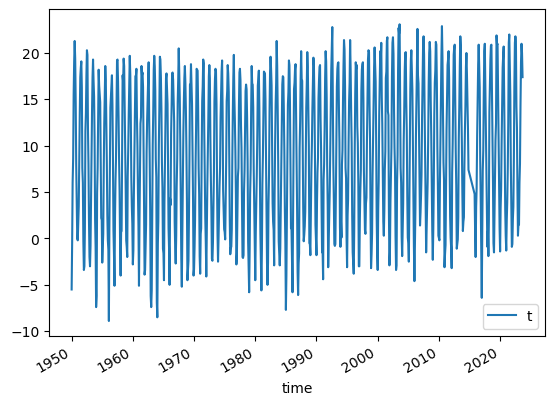

In [119]:
df_wo_nan.plot(x="time", y="t")

<AxesSubplot:xlabel='time'>

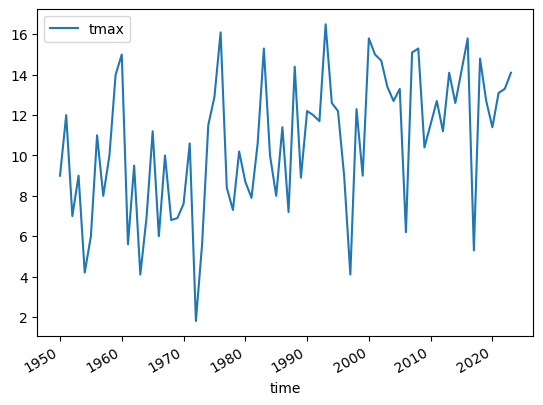

In [122]:
df_wo_nan[df_wo_nan["time"].dt.month==1].plot(x="time", y="tmax")

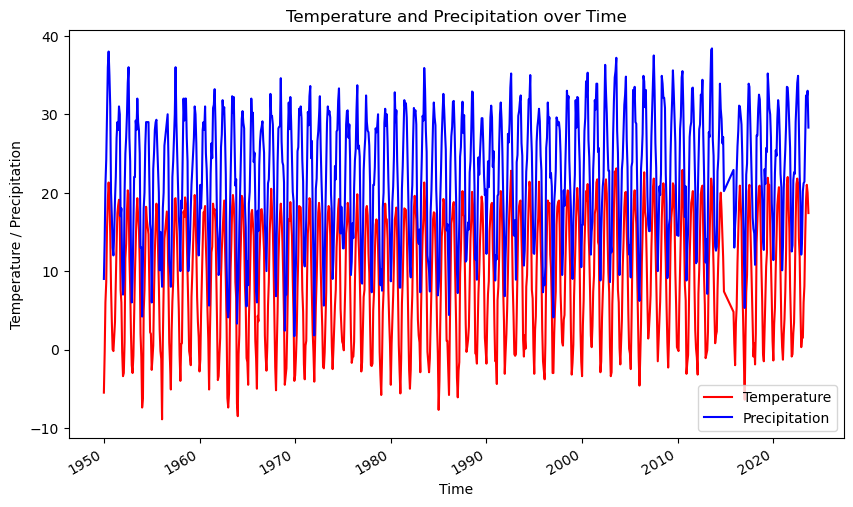

In [121]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

df_wo_nan.plot(x="time", y="t", ax=ax, color="red", label="Temperature")
df_wo_nan.plot(x="time", y="tmax", ax=ax, color="blue", label="Precipitation")

ax.set_xlabel("Time")
ax.set_ylabel("Temperature / Precipitation")
ax.set_title("Temperature and Precipitation over Time")

plt.legend()
plt.show()


In [107]:
df_wo_nan.head()

,time,station,eis,schfall,tmax,tmin,tropen,schmax,t
2194,1950-01-01 00:00:00+00:00,16400,14.0,11.0,9.0,-24.0,0.0,31.0,-5.5
2195,1950-02-01 00:00:00+00:00,16400,5.0,1.0,14.0,-16.0,0.0,29.0,-0.3
2196,1950-03-01 00:00:00+00:00,16400,0.0,1.0,21.0,-4.3,0.0,7.0,6.0
2197,1950-04-01 00:00:00+00:00,16400,0.0,0.0,24.2,-5.0,0.0,0.0,8.6
2198,1950-05-01 00:00:00+00:00,16400,0.0,0.0,30.0,1.0,1.0,0.0,15.5


In [108]:
df_wo_nan.to_csv("data_wo_nan.csv", index=False)

In [109]:
df_wo_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 2194 to 3078
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   time     864 non-null    datetime64[ns, UTC]
 1   station  864 non-null    int64              
 2   eis      864 non-null    float64            
 3   schfall  864 non-null    float64            
 4   tmax     864 non-null    float64            
 5   tmin     864 non-null    float64            
 6   tropen   864 non-null    float64            
 7   schmax   864 non-null    float64            
 8   t        864 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 67.5 KB
